In [117]:
%cd output

/mnt/castor/seas_home/r/riverd/LLM_unlearning/output


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import time
csv_path = 'outputs/results.csv'
df = pd.read_csv(csv_path)
# df = df[['method', 'contrastive_coef', 'model_name_or_path', 'strat', 'num_epochs', 'wikitext_perplexity', 'focus', 'lr', 'relu_threshold', 'lr_su', 'num_epochs_su', 'su_strength', 'cd_num_token', 'el_3', 'news_mauve', 'wikitext_mauve', 'piqa_', 'winogrande_winogrande_s']]
df = df[df['model_name_or_path'] == 'EleutherAI/gpt-neo-125m']
df = df[df['focus'] == False]
df = df.sort_values(['num_epochs', 'num_epochs_su'])
pd.set_option('display.max_columns', None)

params = {'legend.fontsize': 16,
          'legend.handlelength': 2,
          'axes.labelsize': 24,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)
# plt.rcParams.update({'font.size': 24})

# metrics = ['piqa_', 'ai2_arc_ARC-Challenge', 'super_glue_copa', 'winogrande_winogrande_s', 'validation_data/pubmed_qa.csv_', 'hellaswag_']
name_map = {'piqa_': 'Piqa', 'ai2_arc_ARC-Challenge': 'ARC-Challenge', 'super_glue_copa': 'Copa', 'winogrande_winogrande_s': 'Winogrande', 'validation_data/pubmed_qa.csv_': 'Pubmed', 'hellaswag_': 'Hellaswag'}
# 'news_mauve', 'wikitext_mauve', 'ma', 'similarity_ul', 'el_3', 'el_10', 'NLU_avg'
metric_label_map = {'news_mauve': 'MAUVE', 'wikitext_mauve': "Wiki MAUVE", 'ma': 'MA', 'similarity_ul': 'Simimlarity', 'el_3': 'EL$_3$', 'el_10': 'EL$_{10}$', 'NLU_avg': 'NLU', 'news_perplexity': 'News Perplexity', 'wikitext_perplexity': 'Wiki Perplexity', 'wikitext_rep_3': 'Wiki Rep 3'}
metric_name_map = {'news_mauve': 'MAUVE', 'wikitext_mauve': "Wiki MAUVE", 'ma': 'MA', 'similarity_ul': 'Simimlarity', 'el_3': 'EL', 'el_10': 'EL10', 'NLU_avg': 'NLU', 'news_perplexity': 'News Perplexity', 'wikitext_perplexity': 'Wiki Perplexity'}

df = df.rename(columns=name_map)
df['NLU_avg'] = df[['Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']].mean(axis=1)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [75]:
wiki_mauve = df[df['method'] == 'raw_gpt'].reset_index()['wikitext_mauve'][0]
news_mauve = df[df['method'] == 'raw_gpt'].reset_index()['news_mauve'][0]
wiki_ppl = df[df['method'] == 'raw_gpt'].reset_index()['wikitext_perplexity'][0]

def get_raw_metric(metric):
    return df[df['method'] == 'raw_gpt'].reset_index()[metric][0]

df['mauve'] = df['news_mauve']
df['ppl'] = df['news_perplexity']
df['rep_3'] = df['news_rep_3']
raw_mauve = news_mauve

# df['mauve'] = df['wikitext_mauve']
# raw_mauve = wiki_mauve

# df['mauve'] = df['wikitext_mauve']
# raw_mauve = wiki_mauve
raw_el = df[df['method'] == 'raw_gpt'].reset_index()['el_3'][0]
print("wiki_mauve", wiki_mauve, "news_mauve", news_mauve, 'avg', (wiki_mauve + news_mauve) / 2)

wiki_mauve 0.5141367851345813 news_mauve 0.7095268348465642 avg 0.6118318099905727


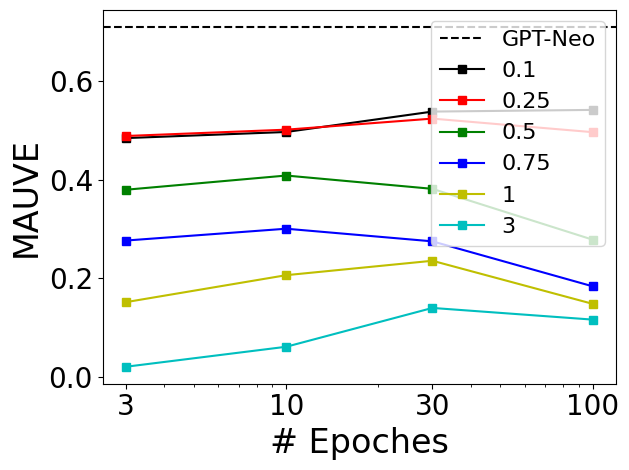

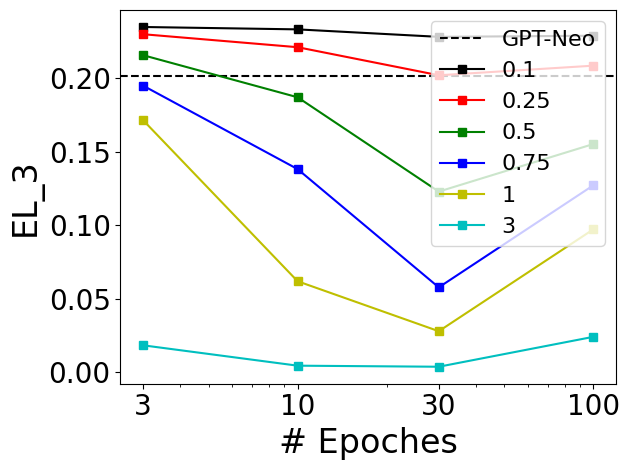

<Figure size 640x480 with 0 Axes>

In [72]:
## HP Relu 
hp_relu = df[(df['method'] == 'contrasive') & (df['strat'] == 'relu2') & (df['cd_num_token'] == 1000) & (df['lr'] == 1e-4)]

plt.axhline(y=raw_mauve, color='k', label='GPT-Neo', linestyle='--')
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.1]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.1]['mauve'],'s-',color = 'k',label="0.1")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.25]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.25]['mauve'],'s-',color = 'r',label="0.25")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.5]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.5]['mauve'],'s-',color = 'g',label="0.5")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.75]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.75]['mauve'],'s-',color = 'b',label="0.75")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 1.0]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 1.0]['mauve'],'s-',color = 'y',label="1")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 3.0]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 3.0]['mauve'],'s-',color = 'c',label="3")#s-:方形
plt.xscale('log')
ax = plt.gca()
ax.set_xticks([10**1, 3, 30, 10**2])
ax.set_xticklabels(['10', '3', '30', '100'])

plt.xlabel("# Epoches")#横坐标名字
plt.ylabel("MAUVE")#纵坐标名字
plt.legend(loc = "upper right")#图例
plt.show()
plt.savefig('figures/HP_Relu_MAUVE.png')

plt.axhline(y=raw_el, color='k', label='GPT-Neo', linestyle='--')
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.1]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.1]['el_3'],'s-',color = 'k',label="0.1")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.25]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.25]['el_3'],'s-',color = 'r',label="0.25")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.5]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.5]['el_3'],'s-',color = 'g',label="0.5")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 0.75]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 0.75]['el_3'],'s-',color = 'b',label="0.75")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 1.0]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 1.0]['el_3'],'s-',color = 'y',label="1")#s-:方形
plt.plot(hp_relu[hp_relu['contrastive_coef'] == 3.0]['num_epochs'],hp_relu[hp_relu['contrastive_coef'] == 3.0]['el_3'],'s-',color = 'c',label="3")#s-:方形

plt.xscale('log')
ax = plt.gca()
ax.set_xticks([10**1, 3, 30, 10**2])
ax.set_xticklabels(['10', '3', '30', '100'])

plt.xlabel("# Epoches")#横坐标名字
plt.ylabel("EL_3")#纵坐标名字
plt.legend(loc = "upper right")#图例
plt.show()
plt.savefig('figures/HP_Relu_EL.png')

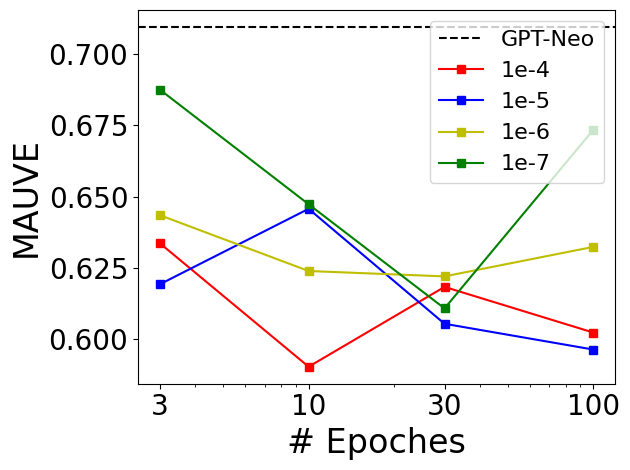

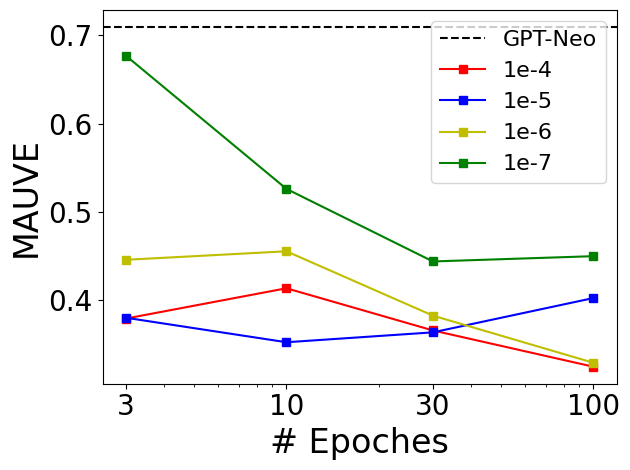

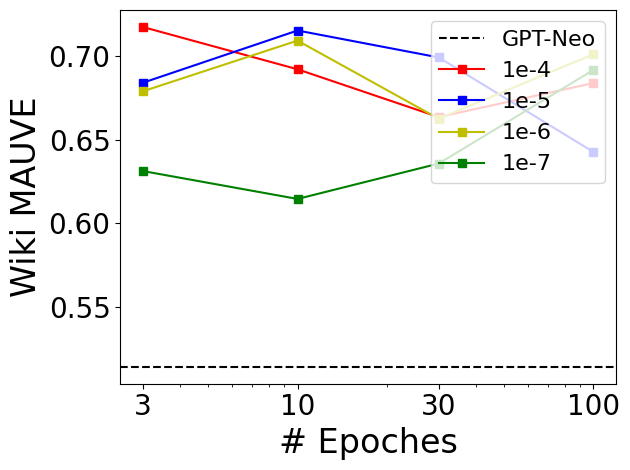

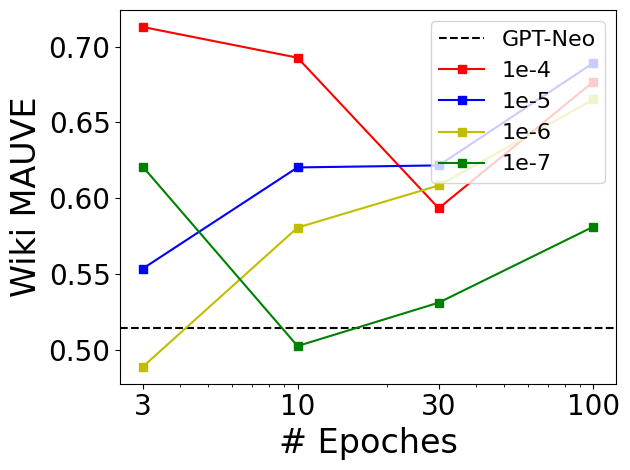

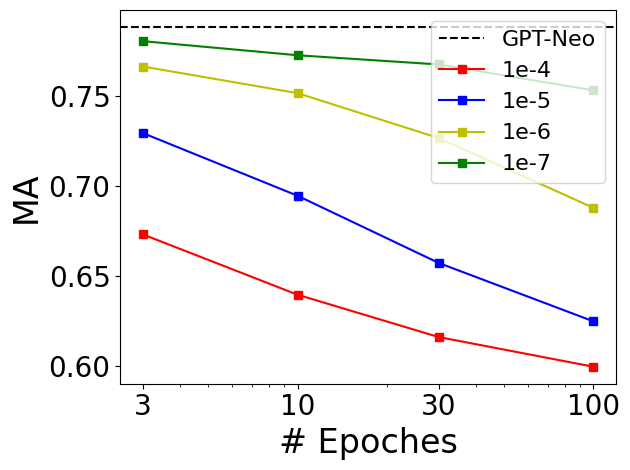

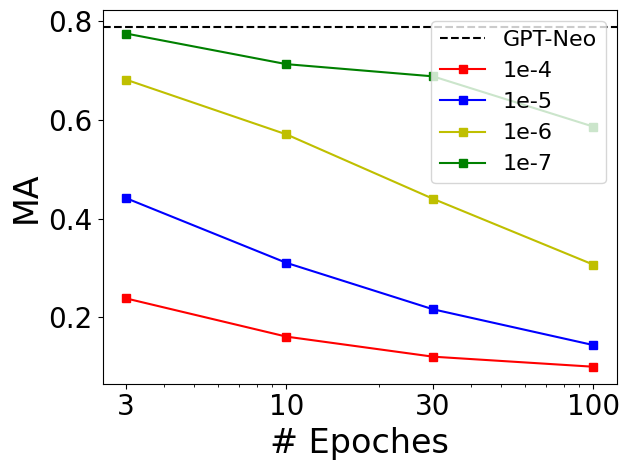

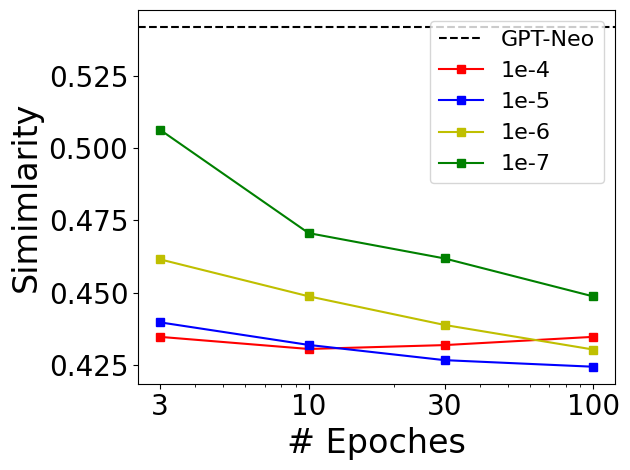

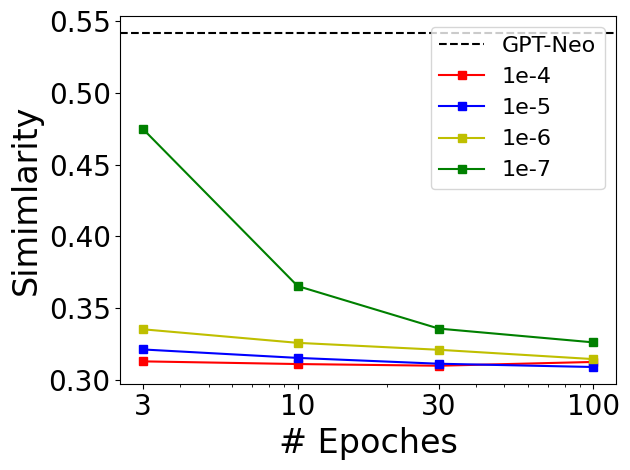

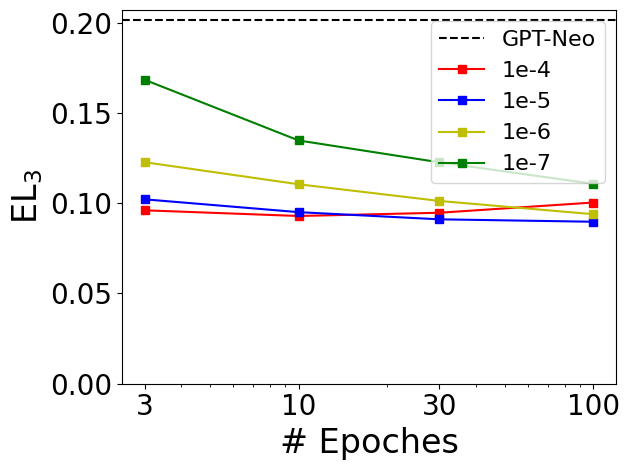

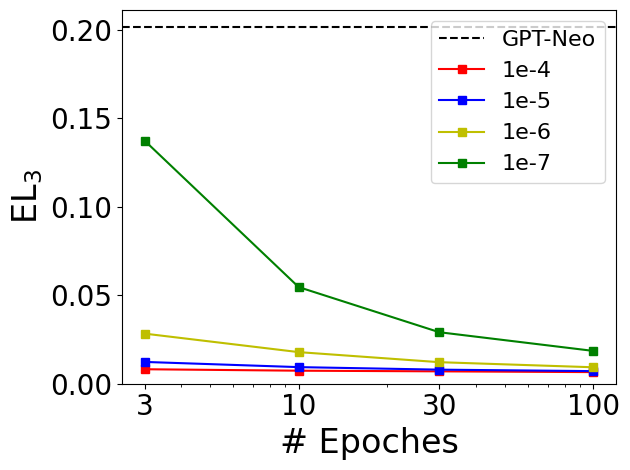

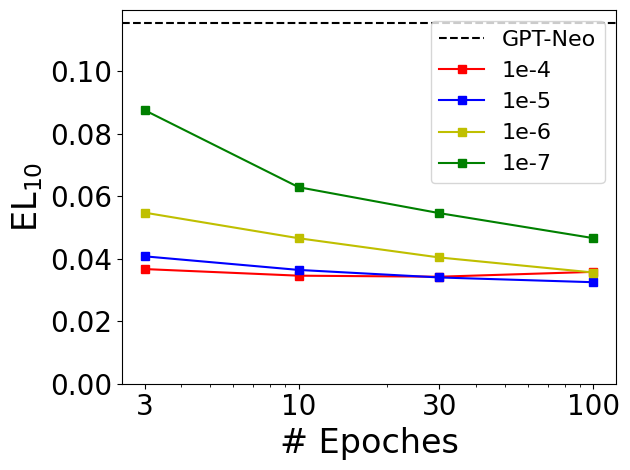

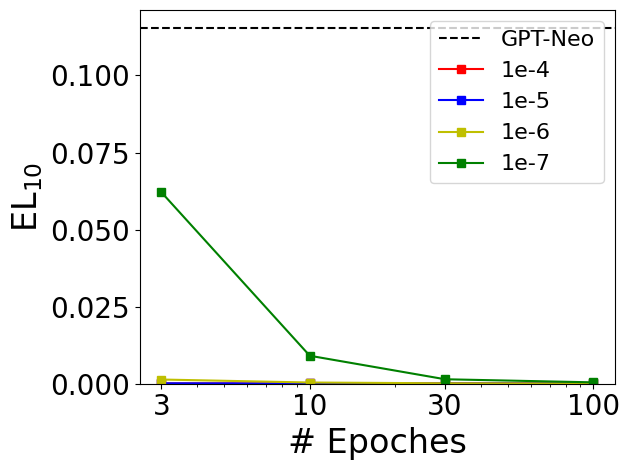

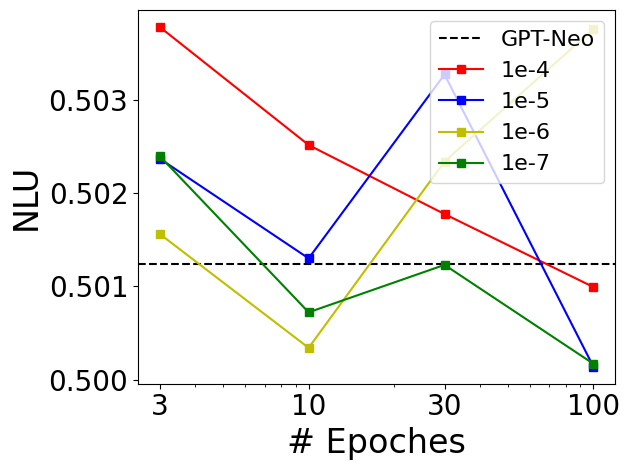

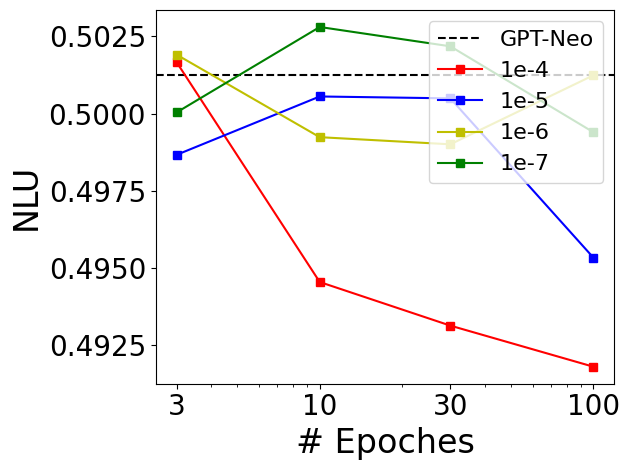

In [64]:
## Soft Unlikelihood
for metric in ['news_mauve', 'wikitext_mauve', 'ma', 'similarity_ul', 'el_3', 'el_10', 'NLU_avg']:
    for strength in [3, 10]:
        try:
            su = df[(df['method'] == 'soft_unlikelihood') & (df['su_strength'] == strength)]
            plt.axhline(y=get_raw_metric(metric), color='k', label='GPT-Neo', linestyle='--')
            plt.plot(su[su['lr_su'] == 1e-4]['num_epochs_su'],su[su['lr_su'] == 1e-4][metric],'s-',color = 'r',label="1e-4")
            plt.plot(su[su['lr_su'] == 1e-5]['num_epochs_su'],su[su['lr_su'] == 1e-5][metric],'s-',color = 'b',label="1e-5")
            plt.plot(su[su['lr_su'] == 1e-6]['num_epochs_su'],su[su['lr_su'] == 1e-6][metric],'s-',color = 'y',label="1e-6")
            plt.plot(su[su['lr_su'] == 1e-7]['num_epochs_su'],su[su['lr_su'] == 1e-7][metric],'s-',color = 'g',label="1e-7")

            plt.xscale('log')
            ax = plt.gca()
            if 'el' in metric:
                ax.set_ylim([0, None])
            ax.set_xticks([10**1, 3, 30, 10**2])
            ax.set_xticklabels(['10', '3', '30', '100'])

            plt.xlabel("# Epoches")#横坐标名字
            plt.ylabel(metric_label_map[metric])#纵坐标名字
            plt.legend(loc = "upper right")#图例
            plt.savefig(f'figures/su_lr_{metric_name_map[metric].replace(" ", "_")}_{strength}.pdf')
            plt.show()
        except:
            print(f"{metric} {strength} not found")

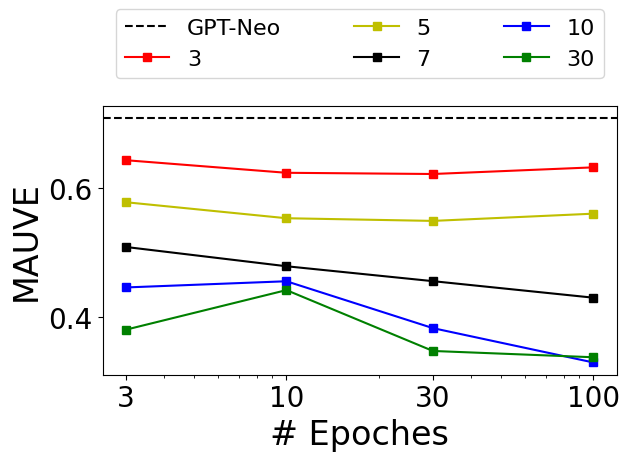

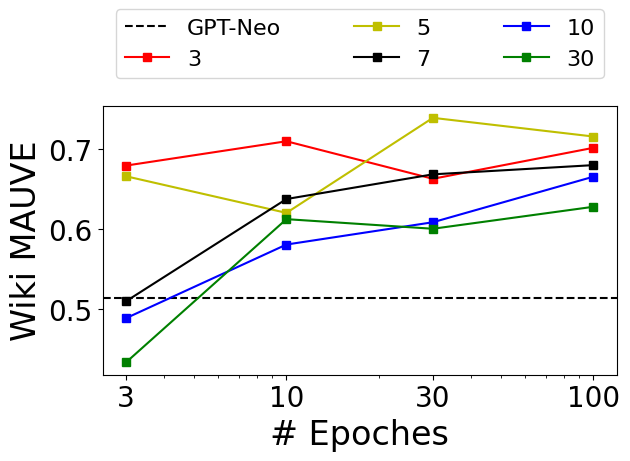

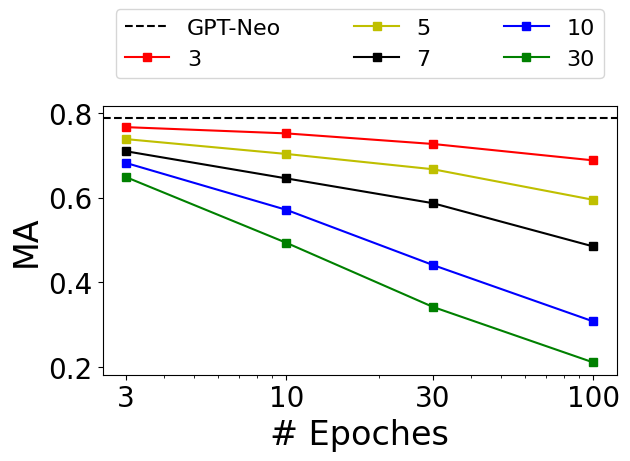

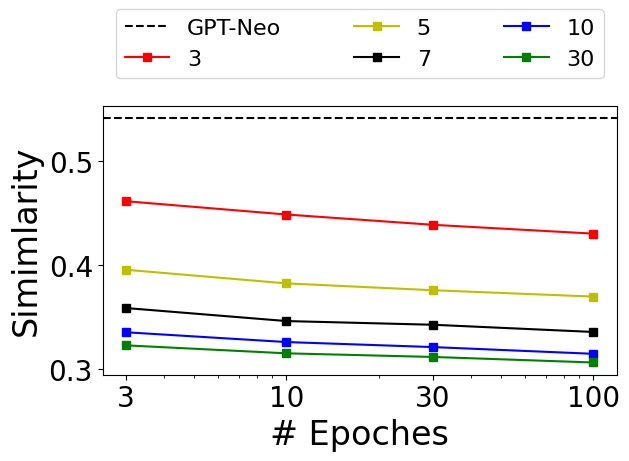

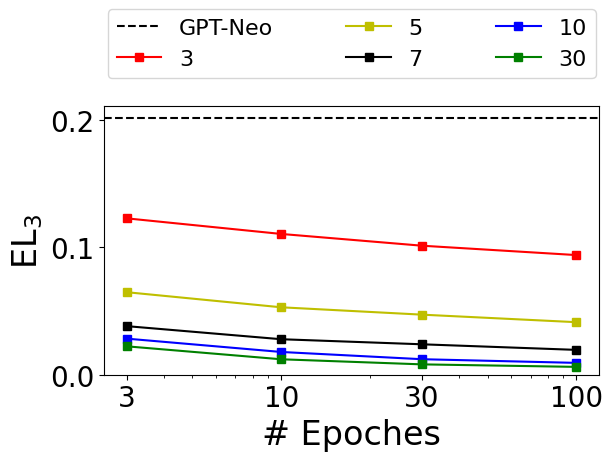

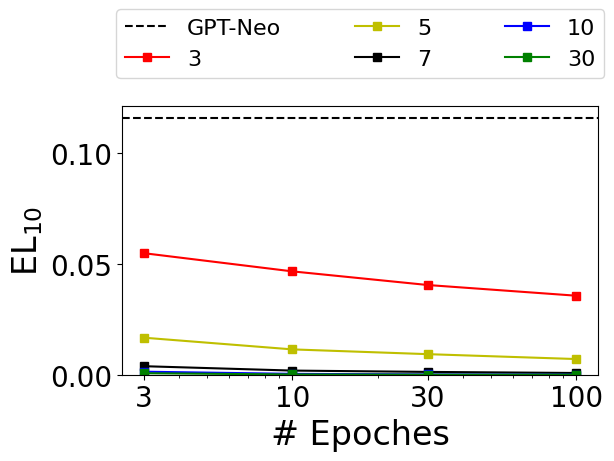

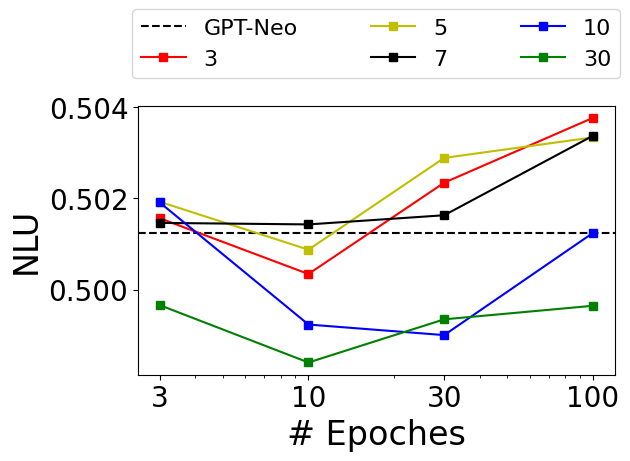

In [73]:
## Soft Unlikelihood
for metric in ['news_mauve', 'wikitext_mauve', 'ma', 'similarity_ul', 'el_3', 'el_10', 'NLU_avg']:
        try:
            su = df[(df['method'] == 'soft_unlikelihood') & (df['lr_su'] == 1e-6)]
            plt.axhline(y=get_raw_metric(metric), color='k', label='GPT-Neo', linestyle='--')
            plt.plot(su[su['su_strength'] == 3]['num_epochs_su'],su[su['su_strength'] == 3][metric],'s-',color = 'r',label="3")
            plt.plot(su[su['su_strength'] == 5]['num_epochs_su'],su[su['su_strength'] == 5][metric],'s-',color = 'y',label="5")
            plt.plot(su[su['su_strength'] == 7]['num_epochs_su'],su[su['su_strength'] == 7][metric],'s-',color = 'k',label="7")
            plt.plot(su[su['su_strength'] == 10]['num_epochs_su'],su[su['su_strength'] == 10][metric],'s-',color = 'b',label="10")
            plt.plot(su[su['su_strength'] == 30]['num_epochs_su'],su[su['su_strength'] == 30][metric],'s-',color = 'g',label="30")
            
            plt.xscale('log')
            ax = plt.gca()
            if 'el' in metric:
                ax.set_ylim([0, None])
            ax.set_xticks([10**1, 3, 30, 10**2])
            ax.set_xticklabels(['10', '3', '30', '100'])

            plt.xlabel("# Epoches")#横坐标名字
            plt.ylabel(metric_label_map[metric])#纵坐标名字
            # plt.legend(loc = "upper right")#图例
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=3, columnspacing=3.3)
            plt.savefig(f'figures/su_strength_{metric_name_map[metric].replace(" ", "_")}.pdf')
            plt.show()
        except:
            print(f"{metric} {strength} not found")

/tmp/ipykernel_19810/3641672388.py:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  su = pd.concat([raw_gpt, su2, su])
/tmp/ipykernel_19810/3641672388.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  hp_relu = pd.concat([raw_gpt, hp_relu, hp_relu3])
/tmp/ipykernel_19810/3641672388.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  dp = pd.concat([dp, raw_gpt])
/tmp/ipykernel_19810/3641672388.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

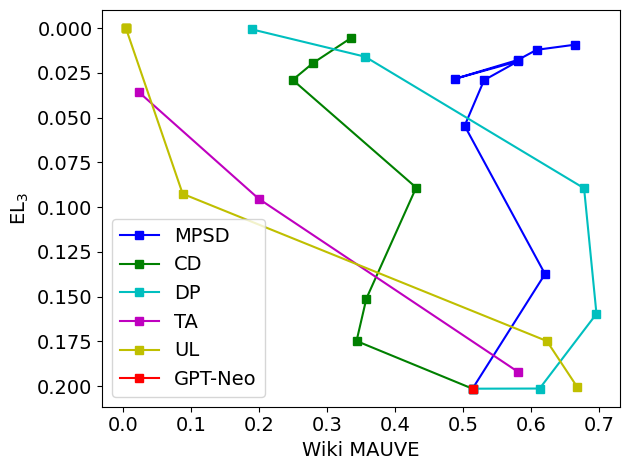

/tmp/ipykernel_19810/3641672388.py:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  su = pd.concat([raw_gpt, su2, su])
/tmp/ipykernel_19810/3641672388.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  hp_relu = pd.concat([raw_gpt, hp_relu, hp_relu3])
/tmp/ipykernel_19810/3641672388.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  dp = pd.concat([dp, raw_gpt])
/tmp/ipykernel_19810/3641672388.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

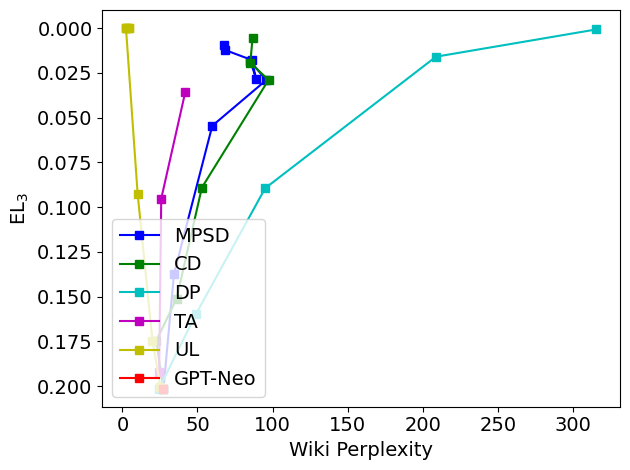

/tmp/ipykernel_19810/3641672388.py:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  su = pd.concat([raw_gpt, su2, su])
/tmp/ipykernel_19810/3641672388.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  hp_relu = pd.concat([raw_gpt, hp_relu, hp_relu3])
/tmp/ipykernel_19810/3641672388.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  dp = pd.concat([dp, raw_gpt])
/tmp/ipykernel_19810/3641672388.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

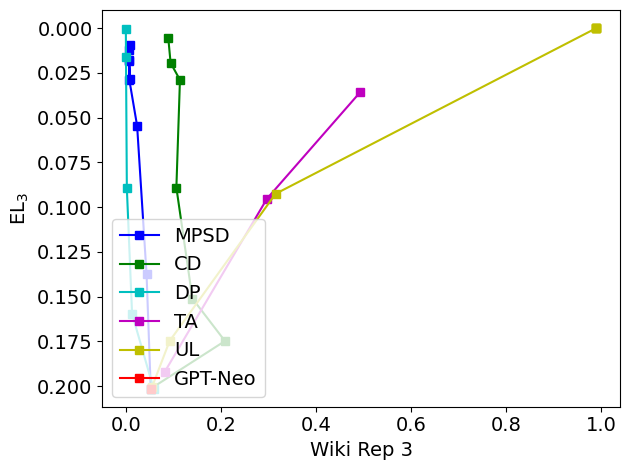

/tmp/ipykernel_19810/3641672388.py:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  su = pd.concat([raw_gpt, su2, su])
/tmp/ipykernel_19810/3641672388.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  hp_relu = pd.concat([raw_gpt, hp_relu, hp_relu3])
/tmp/ipykernel_19810/3641672388.py:27: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  dp = pd.concat([dp, raw_gpt])
/tmp/ipykernel_19810/3641672388.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

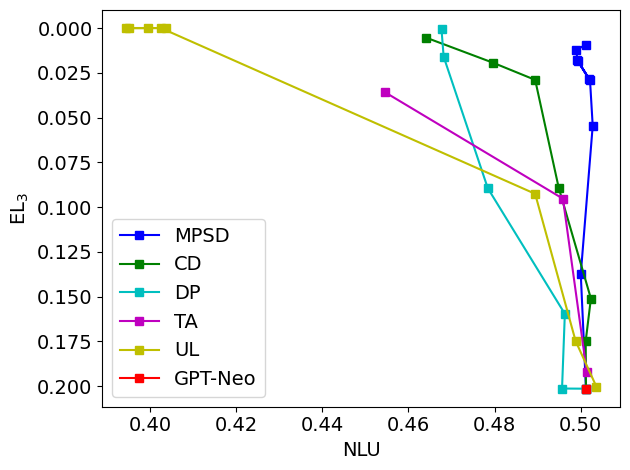

In [112]:
params = {'legend.fontsize': 14,
          'legend.handlelength': 2,
          'axes.labelsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14}
plt.rcParams.update(params)

rcParams.update({'figure.autolayout': True})
for x_axis in ['wikitext_mauve', 'wikitext_perplexity', 'wikitext_rep_3', 'NLU_avg']:
    y_axis = "el_3"
    raw_gpt = df[df['method'] == 'raw_gpt'].iloc[0].to_frame().T
    plt.gca().invert_yaxis()
    # plt.plot(raw_gpt['mauve'], raw_gpt['el_3'],'s-',color = 'r',label="raw_gpt")

    su = df[(df['method'] == 'soft_unlikelihood') & (df['lr_su'] == 1e-6) & (df['su_strength'] == 10)]
    su2 = df[(df['method'] == 'soft_unlikelihood') & (df['lr_su'] == 1e-7) & (df['su_strength'] == 10)]
    su = pd.concat([raw_gpt, su2, su])
    plt.plot(su[x_axis], su[y_axis],'s-',color = 'b',label="MPSD")

    hp_relu = df[(df['method'] == 'contrasive') & (df['strat'] == 'relu2') & (df['cd_num_token'] == 1000) & (df['contrastive_coef'] == 0.25) & (df['lr'] == 6e-4) & (df['num_epochs'] != 3)]
    hp_relu3 = df[(df['method'] == 'contrasive') & (df['strat'] == 'relu2') & (df['cd_num_token'] == 1000) & (df['contrastive_coef'] == 0.75) & (df['lr'] == 6e-4) & (df['num_epochs'] != 3)]
    hp_relu = pd.concat([raw_gpt, hp_relu, hp_relu3])
    # hp_relu = pd.concat([raw_gpt, hp_relu2, hp_relu3])
    plt.plot(hp_relu[x_axis], hp_relu[y_axis],'s-',color = 'g',label="CD")

    dp = df[(df['method'] == 'DP') & (df['DP_coef'] != 0)].drop_duplicates(subset='DP_coef', keep="last")
    dp = pd.concat([dp, raw_gpt])
    plt.plot(dp[x_axis], dp[y_axis],'s-',color = 'c', label="DP")

    ta = df[(df['method'] == 'weight_subtraction') & (df['weight_subtraction_coef'] < 0.25) & (df['num_epochs'] == 30) & (df['lr'] == 6e-4)].sort_values('el_3', ascending=False)
    plt.plot(ta[x_axis], ta[y_axis],'s-',color = 'm',label="TA")

    ul = df[(df['method'] == 'unlikelihood')]
    ul.sort_values('el_3', inplace=True)
    plt.plot(ul[x_axis], ul['el_3'],'s-',color = 'y',label="UL")
    plt.plot(raw_gpt[x_axis], raw_gpt[y_axis],'s-',color = 'r',label="GPT-Neo")

    plt.xlabel(metric_label_map[x_axis])
    plt.ylabel(metric_label_map[y_axis])
    # plt.legend(loc = "upper right", bbox_to_anchor=(1.4, 1))#图例
    plt.legend(loc = "lower left")
    plt.savefig(f'figures/all_methods_{x_axis}_{y_axis}.pdf')
    plt.show()
    # peft 64, 
    ## Gradient accumulation 8, batch size 8, 8*8=64

In [134]:
su = df[(df['method'] == 'soft_unlikelihood') & (df['lr_su'] == 1e-6) & (df['num_epochs_su'] == 100)]
su = su[['su_strength',  'el_3', 'mauve', 'ppl', 'rep_3', 'Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']]
su = su.apply(pd.to_numeric, errors='ignore').round(3)
print(su.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrr}
\toprule
 su\_strength &  el\_3 &  mauve &    ppl &  rep\_3 &  Piqa &  ARC-Challenge &  Copa &  Winogrande &  Pubmed &  Hellaswag \\
\midrule
         3.0 & 0.094 &  0.632 & 33.398 &  0.010 & 0.631 &          0.375 & 0.640 &       0.519 &   0.575 &      0.283 \\
        10.0 & 0.009 &  0.329 & 79.670 &  0.006 & 0.626 &          0.370 & 0.640 &       0.515 &   0.575 &      0.281 \\
        30.0 & 0.006 &  0.337 & 84.726 &  0.006 & 0.626 &          0.362 & 0.640 &       0.514 &   0.575 &      0.281 \\
         5.0 & 0.041 &  0.560 & 46.200 &  0.007 & 0.628 &          0.372 & 0.644 &       0.520 &   0.574 &      0.283 \\
         7.0 & 0.019 &  0.429 & 62.062 &  0.006 & 0.627 &          0.368 & 0.658 &       0.512 &   0.574 &      0.281 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_25106/1642780677.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(su.to_latex(index=False))


In [86]:
raw_gpt = df[df['method'] == 'raw_gpt'].iloc[1].to_frame().T
ul = df[(df['method'] == 'unlikelihood') & (df['num_epochs'] == 5)]
dp = df[(df['method'] == 'DP')]
cd = df[(df['method'] == 'contrasive') & (df['strat'] == 'relu2') & (df['cd_num_token'] == 1000) & (df['num_epochs'] == 100) & (df['lr'] == 6e-4) & (df['contrastive_coef'] <= 1)]
ta = df[(df['method'] == 'weight_subtraction') & (df['weight_subtraction_coef']==0.25) & (df['num_epochs'] == 30)]
su = df[(df['method'] == 'soft_unlikelihood') & (df['lr_su'] == 1e-6) & (df['num_epochs_su'] == 100)]
nlu = pd.concat([raw_gpt, ul, dp, cd, ta])
nlu = nlu.apply(pd.to_numeric, errors='ignore').round(3)
nlu = nlu[['method', 'DP_coef', 'contrastive_coef', 'mauve', 'ppl', 'rep_3', 'el_3', 'Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']]
print(nlu.to_latex(index=False))
# df[(df['method'] == 'weight_subtraction') & (df['weight_subtraction_coef']==0.25)][['el_3', 'piqa_',  'ai2_arc_ARC-Easy','ai2_arc_ARC-Challenge', 'super_glue_copa', 'winogrande_winogrande_s', 'validation_data/pubmed_qa.csv_', 'hellaswag_', 'contrastive_coef']]

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
            method &  DP\_coef &  contrastive\_coef &  mauve &       ppl &  rep\_3 &  el\_3 &  Piqa &  ARC-Challenge &  Copa &  Winogrande &  Pubmed &  Hellaswag \\
\midrule
           raw\_gpt &      0.0 &              0.10 &  0.718 &    17.192 &  0.035 & 0.202 & 0.634 &          0.383 & 0.630 &       0.515 &   0.574 &      0.282 \\
      unlikelihood &      0.0 &              0.10 &  0.004 &     3.381 &  0.990 & 0.000 & 0.524 &          0.257 & 0.560 &       0.498 &   0.325 &      0.258 \\
      unlikelihood &      0.0 &              0.10 &  0.004 &     2.187 &  0.990 & 0.000 & 0.517 &          0.256 & 0.510 &       0.506 &   0.325 &      0.258 \\
      unlikelihood &      0.0 &              0.10 &  0.004 &     2.051 &  0.990 & 0.000 & 0.518 &          0.252 & 0.560 &       0.504 &   0.325 &      0.256 \\
      unlikelihood &      0.0 &              0.10 &  0.574 &    15.133 &  0.053 & 0.175 & 0.622 &          0.368 & 0.630 &       0.515 &   0.

/tmp/ipykernel_25106/1750636681.py:7: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  nlu = pd.concat([raw_gpt, ul, dp, cd, ta])
/tmp/ipykernel_25106/1750636681.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(nlu.to_latex(index=False))


# Focused Unlearning

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
csv_path = 'outputs_focus/results.csv'
df = pd.read_csv(csv_path)
# df = df[['method', 'contrastive_coef', 'model_name_or_path', 'strat',  'focus_dataset', 'focus_hard', 'num_epochs', 'focus', 'focus_type', 'focus_coeff', 'lr', 'relu_threshold', 'lr_su', 'num_epochs_su', 'su_strength', 'cd_num_token', 'el_3', 'news_mauve', 'wikitext_mauve', 'piqa_', 'winogrande_winogrande_s']]
df = df[df['model_name_or_path'] == 'EleutherAI/gpt-neo-125m']
df = df[(df['focus'] == True) | (df['focus_dataset'] == True)]
df = df.sort_values(['num_epochs', 'num_epochs_su'])
df['mauve'] = df['news_mauve']
# df['mauve'] = df['wikitext_mauve']

pd.set_option('display.max_columns', None)

params = {'legend.fontsize': 16,
          'legend.handlelength': 2,
          'axes.labelsize': 24,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}
plt.rcParams.update(params)

# metrics = ['piqa_', 'ai2_arc_ARC-Challenge', 'super_glue_copa', 'winogrande_winogrande_s', 'validation_data/pubmed_qa.csv_', 'hellaswag_']
name_map = {'piqa_': 'Piqa', 'ai2_arc_ARC-Challenge': 'ARC-Challenge', 'super_glue_copa': 'Copa', 'winogrande_winogrande_s': 'Winogrande', 'validation_data/pubmed_qa.csv_': 'Pubmed', 'hellaswag_': 'Hellaswag'}
df = df.rename(columns=name_map)
df['NLU_avg'] = df[['Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']].mean(axis=1)

In [67]:
wiki_mauve = df[df['method'] == 'raw_gpt'].reset_index()['wikitext_mauve'][0]
news_mauve = df[df['method'] == 'raw_gpt'].reset_index()['news_mauve'][0]
raw_gpt = df[df['method'] == 'raw_gpt'].iloc[0].to_frame().T
raw_el = raw_gpt['el_3'].values[0]
raw_mauve = raw_gpt['mauve'].values[0]
# raw_mauve = news_mauve
# raw_el = df[df['method'] == 'raw_gpt'].reset_index()['el_3'][0]
# print("wiki_mauve", wiki_mauve, "news_mauve", news_mauve, 'avg', (wiki_mauve + news_mauve) / 2)

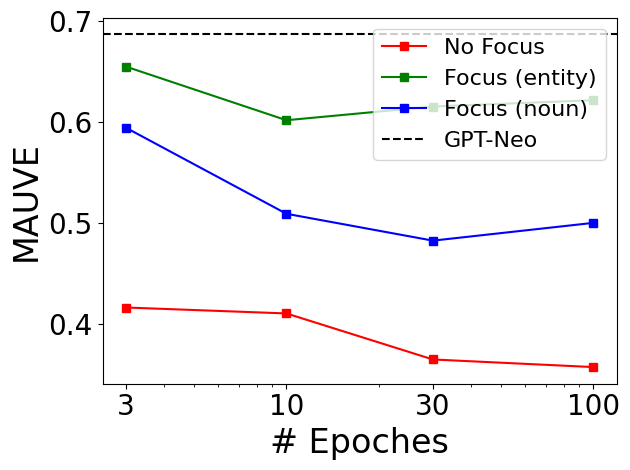

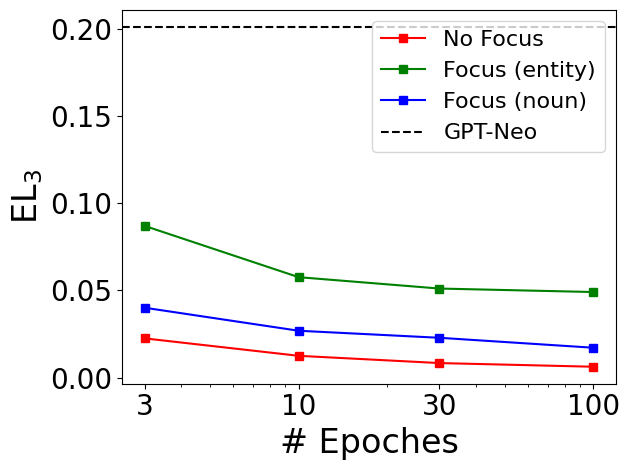

In [68]:
## Soft Unlikelihood
strength = 30
su = df[(df['method'] == 'soft_unlikelihood') & (df['lr_su'] == 1e-6) & (df['su_strength'] == strength)]
# su = df[(df['method'] == 'soft_unlikelihood')]
focus_su = su[su['focus'] == True]
no_foucs_su = su[su['focus'] == False]

plt.plot(no_foucs_su['num_epochs_su'], no_foucs_su['mauve'],'s-',color = 'r',label="No Focus")
plt.plot(focus_su[focus_su['focus_type'] == 'entity']['num_epochs_su'], focus_su[focus_su['focus_type'] == 'entity']['mauve'],'s-',color = 'g',label="Focus (entity)")
plt.plot(focus_su[focus_su['focus_type'] == 'none']['num_epochs_su'], focus_su[focus_su['focus_type'] == 'none']['mauve'],'s-',color = 'b',label="Focus (noun)")
plt.axhline(y=raw_mauve, color='k', label='GPT-Neo', linestyle='--')

plt.xscale('log')
ax = plt.gca()
ax.set_xticks([10**1, 3, 30, 10**2])
ax.set_xticklabels(['10', '3', '30', '100'])

plt.xlabel("# Epoches")#横坐标名字
plt.ylabel("MAUVE")#纵坐标名字
plt.legend(loc = "upper right")#图例
plt.savefig(f'figures/su_lr_MAUVE_focused_{strength}.pdf')
plt.show()

# plt.axhline(y=raw_el, color='k', label='GPT', lw=2)
plt.plot(no_foucs_su['num_epochs_su'], no_foucs_su['el_3'],'s-',color = 'r',label="No Focus")
plt.plot(focus_su[focus_su['focus_type'] == 'entity']['num_epochs_su'], focus_su[focus_su['focus_type'] == 'entity']['el_3'],'s-',color = 'g',label="Focus (entity)")
plt.plot(focus_su[focus_su['focus_type'] == 'none']['num_epochs_su'], focus_su[focus_su['focus_type'] == 'none']['el_3'],'s-',color = 'b',label="Focus (noun)")
plt.axhline(y=raw_el, color='k', label='GPT-Neo', linestyle='--')

plt.xscale('log')
ax = plt.gca()
ax.set_xticks([10**1, 3, 30, 10**2])
ax.set_xticklabels(['10', '3', '30', '100'])

plt.xlabel("# Epoches")#横坐标名字
plt.ylabel("EL$_3$")#纵坐标名字
plt.legend(loc = "upper right")#图例
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=2)
plt.savefig(f'figures/su_lr_EL_focused_{strength}.pdf')
plt.show()

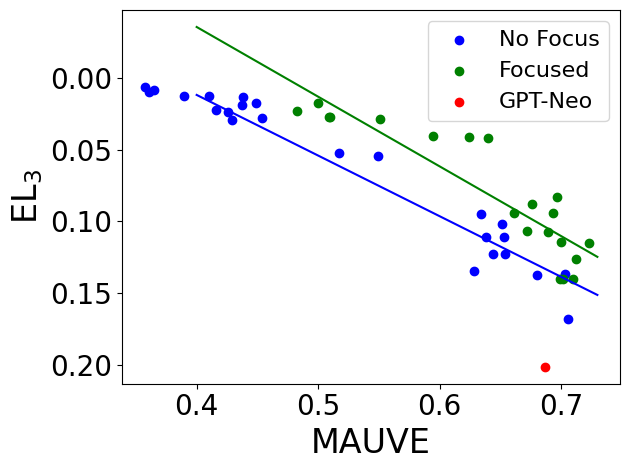

In [69]:
plt.gca().invert_yaxis()
su = df[(df['method'] == 'soft_unlikelihood')]
focus_su = su[su['focus'] == True].sort_values("mauve")
focus_su_entity = su[(su['focus'] == True) & (su['focus_type'] == 'entity')].sort_values("mauve")
focus_su_none = su[(su['focus'] == True) & (su['focus_type'] == 'none')].sort_values("mauve")
no_foucs_su = su[su['focus'] == False].sort_values("mauve")
plt.scatter(no_foucs_su['mauve'], no_foucs_su['el_3'], color = 'b',label="No Focus")
plt.scatter(focus_su_none['mauve'], focus_su_none['el_3'],color = 'g',label="Focused")
plt.scatter(get_raw_metric('news_mauve'), get_raw_metric('el_3') ,color = 'r',label="GPT-Neo")

import numpy as np
coefficients_blue = np.polyfit(no_foucs_su['mauve'], no_foucs_su['el_3'], 1)
coefficients_green = np.polyfit(focus_su_none['mauve'], focus_su_none['el_3'], 1)
coefficients_red = np.polyfit(focus_su_entity['mauve'], focus_su_entity['el_3'], 1)
polynomial_blue = np.poly1d(coefficients_blue)
polynomial_green = np.poly1d(coefficients_green)
polynomial_red = np.poly1d(coefficients_red)

x_axis = np.linspace(0.4, 0.73, 100)
plt.plot(x_axis, polynomial_blue(x_axis), color='blue')
plt.plot(x_axis, polynomial_green(x_axis), color='green')

plt.xlabel("MAUVE")#横坐标名字
plt.ylabel("EL$_3$")#纵坐标名字
plt.legend(loc = "upper right")#图例
plt.savefig(f'figures/su_lr_EL_focused_vs_no_focus.pdf')
plt.show()

# 1.3B

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
csv_path = 'outputs_new/results.csv'
# csv_path = 'outputs_not_important/results.csv'
df = pd.read_csv(csv_path)
# df = df[['method', 'contrastive_coef', 'model_name_or_path', 'gradient_accu', 'peft', 'strat', 'num_epochs', 'focus', 'lr', 'relu_threshold', 'lr_su', 'num_epochs_su', 'su_strength', 'cd_num_token', 'el_3', 'news_mauve', 'wikitext_mauve', 'piqa_', 'winogrande_winogrande_s']]
df = df[df['model_name_or_path'] == 'EleutherAI/gpt-neo-1.3B']
df = df[df['focus'] == False]
df = df.sort_values(['num_epochs', 'num_epochs_su'])
df.fillna('ft', inplace=True)

pd.set_option('display.max_columns', None)

params = {'legend.fontsize': 16,
          'legend.handlelength': 1,
          'axes.labelsize': 24,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}

name_map = {'piqa_': 'Piqa', 'ai2_arc_ARC-Challenge': 'ARC-Challenge', 'super_glue_copa': 'Copa', 'winogrande_winogrande_s': 'Winogrande', 'validation_data/pubmed_qa.csv_': 'Pubmed', 'hellaswag_': 'Hellaswag'}
metric_label_map = {'news_mauve': 'MAUVE', 'wikitext_mauve': "Wiki MAUVE", 'ma': 'MA', 'similarity_ul': 'Simimlarity', 'el_3': 'EL$_3$', 'el_10': 'EL$_{10}$', 'NLU_avg': 'NLU'}
metric_name_map = {'news_mauve': 'MAUVE', 'wikitext_mauve': "Wiki MAUVE", 'ma': 'MA', 'similarity_ul': 'Simimlarity', 'el_3': 'EL', 'el_10': 'EL10', 'NLU_avg': 'NLU'}
df = df.rename(columns=name_map)
df['NLU_avg'] = df[['Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']].mean(axis=1)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [59]:
df['mauve'] = df['news_mauve']
# df = df.drop([71,77])
raw_mauve = df[df['method'] == 'raw_gpt']['mauve'].values[-1]
raw_el = df[df['method'] == 'raw_gpt']['el_3'].values[-1]
def get_raw_metric(metric):
    return df[df['method'] == 'raw_gpt'].reset_index()[metric][0]

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


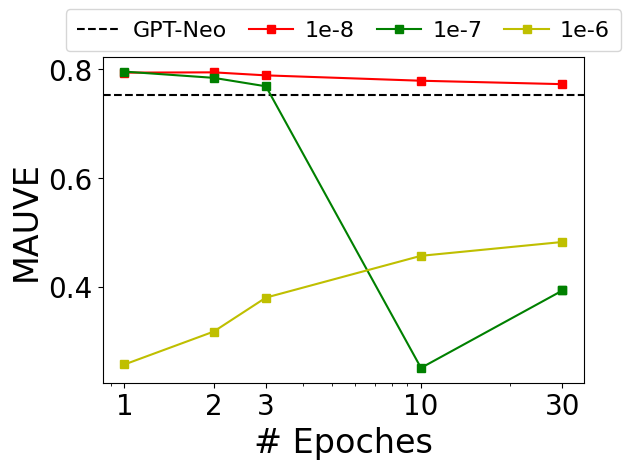

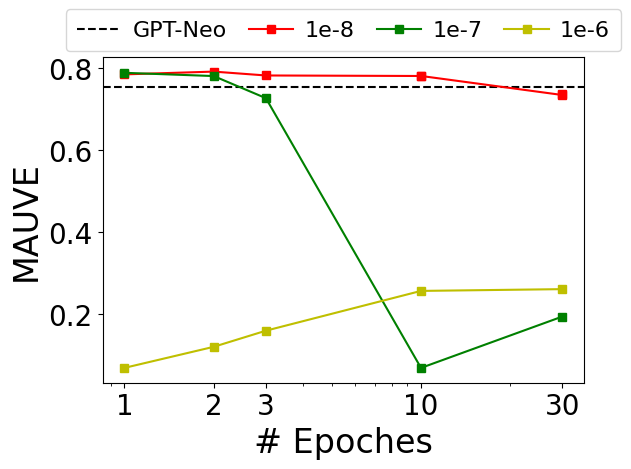

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


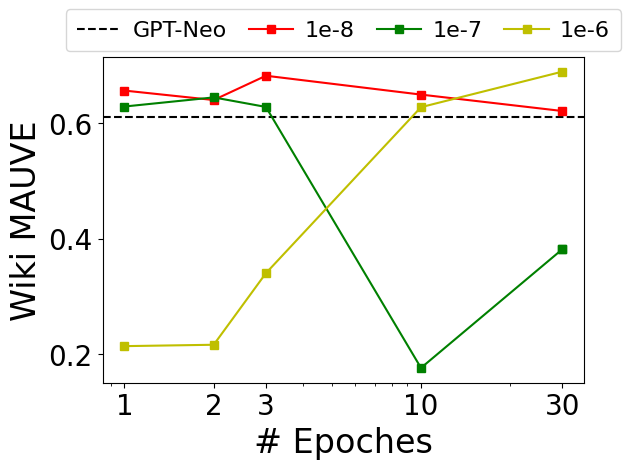

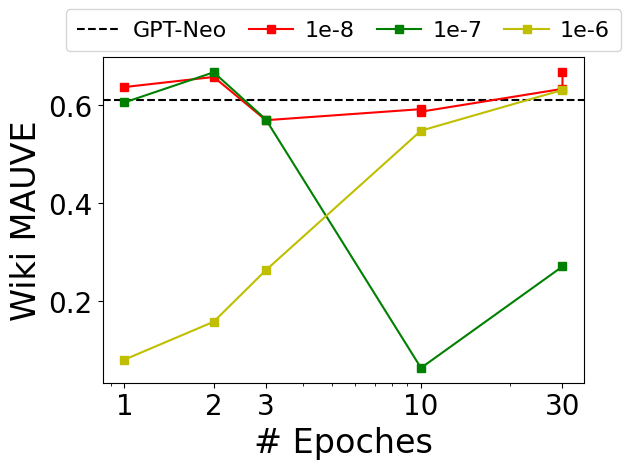

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


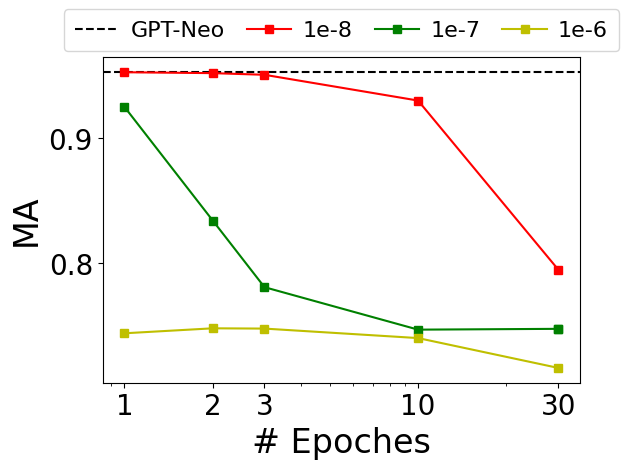

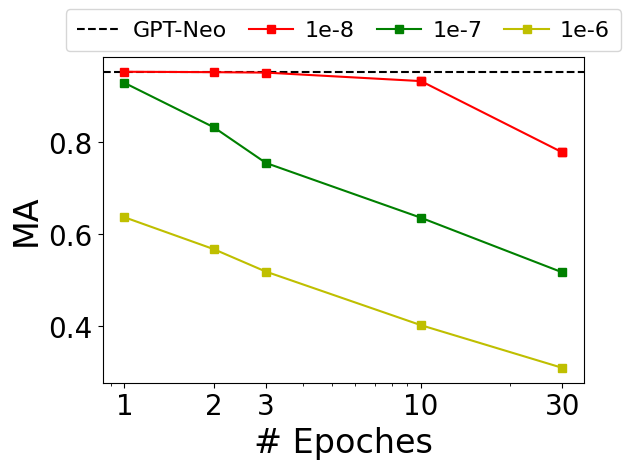

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


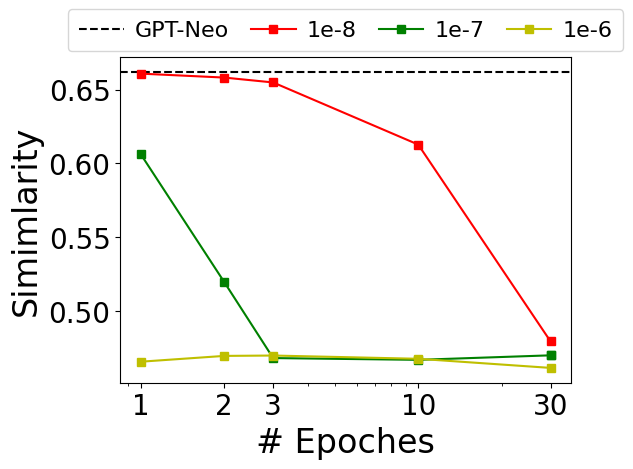

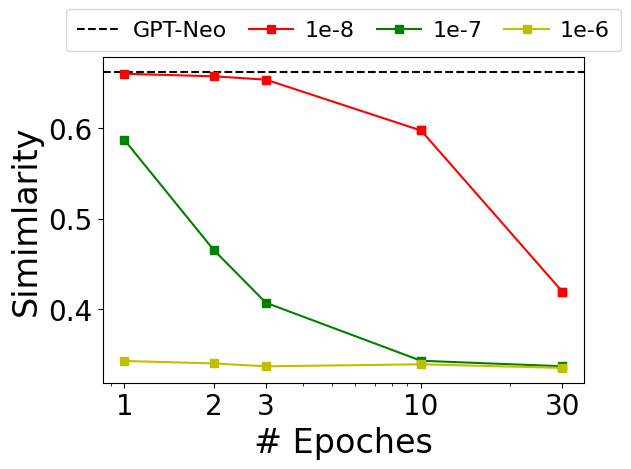

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


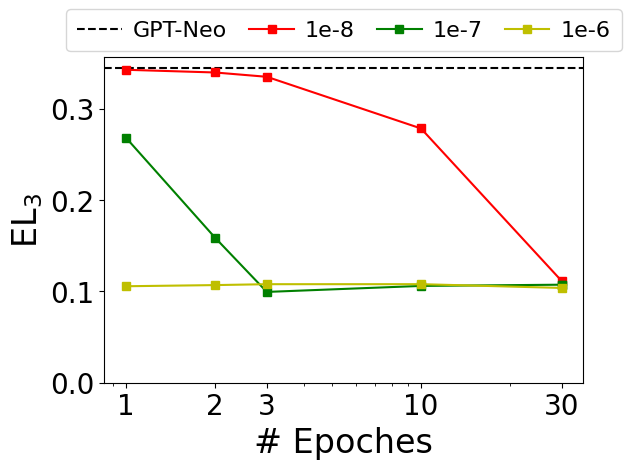

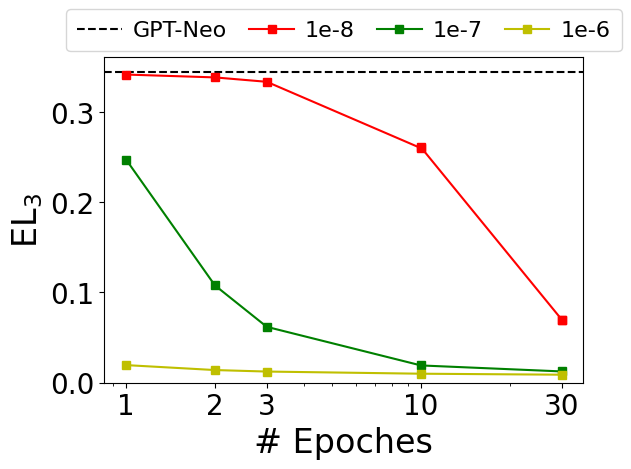

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


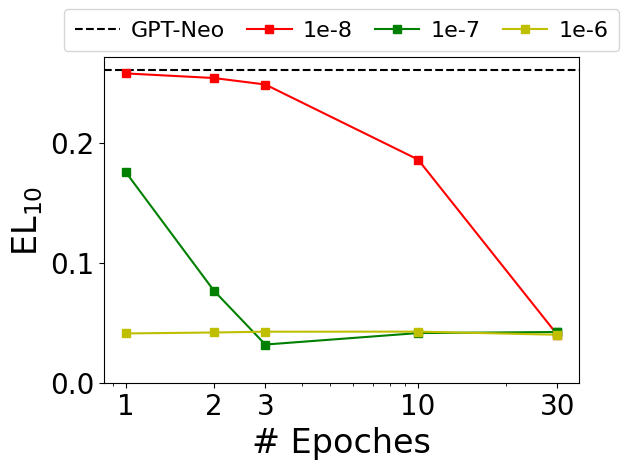

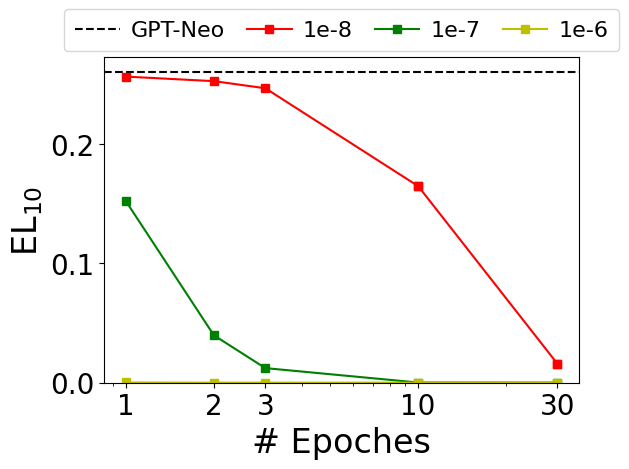

/tmp/ipykernel_19810/743165637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su.drop([71,77], inplace=True)


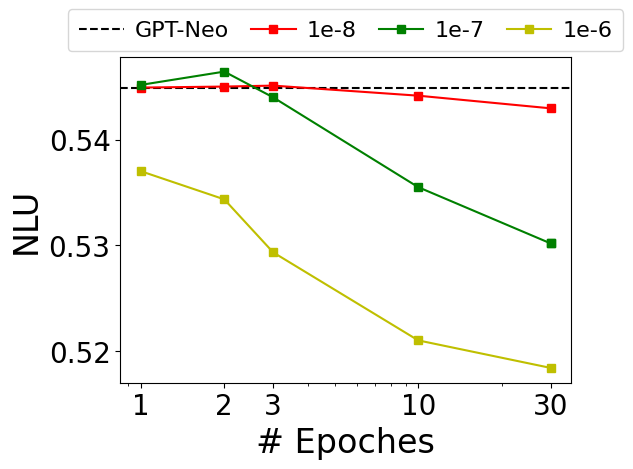

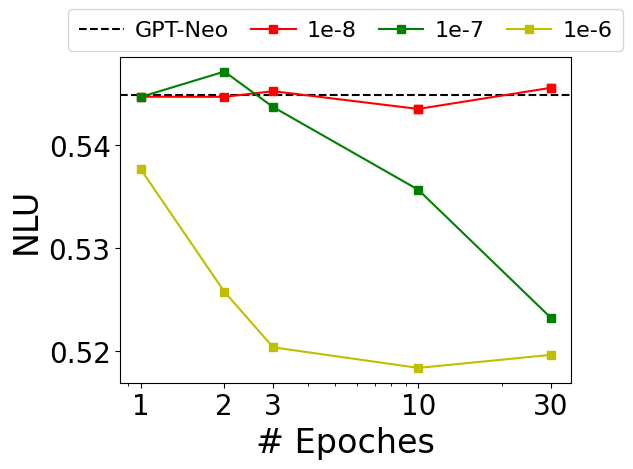

In [60]:
## Soft Unlikelihood (FT)
for metric in ['news_mauve', 'wikitext_mauve', 'ma', 'similarity_ul', 'el_3', 'el_10', 'NLU_avg']:
# for metric in ['news_mauve', 'el_3']:
    for strength in [3, 10]:
        su = df[(df['method'] == 'soft_unlikelihood') & (df['su_strength'] == strength) & (df['peft'] == 'ft')]
        try:
            su.drop([71,77], inplace=True)
        except:
            pass

        plt.axhline(y=get_raw_metric(metric), color='k', label='GPT-Neo', linestyle='--')
        plt.plot(su[su['lr_su'] == 1e-8]['num_epochs_su'],su[su['lr_su'] == 1e-8][metric],'s-',color = 'r',label="1e-8")
        plt.plot(su[su['lr_su'] == 1e-7]['num_epochs_su'],su[su['lr_su'] == 1e-7][metric],'s-',color = 'g',label="1e-7")
        plt.plot(su[su['lr_su'] == 1e-6]['num_epochs_su'],su[su['lr_su'] == 1e-6][metric],'s-',color = 'y',label="1e-6")

        plt.xscale('log')
        ax = plt.gca()
        
        if 'el' in metric:
            ax.set_ylim([0, None])
        ax.set_xticks([1,2, 3, 10, 30])
        ax.set_xticklabels(['1', '2', '3', '10', '30'])

        plt.xlabel("# Epoches")#横坐标名字
        plt.ylabel(metric_label_map[metric])#纵坐标名字
        # plt.legend(loc = "lower left")#图例
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=4, handletextpad=0.5, columnspacing=1.0, borderpad=0.5)
        plt.savefig(f'figures/su_lr_{metric_name_map[metric].replace(" ", "_")}_1.3B_{strength}.pdf')
        plt.show()


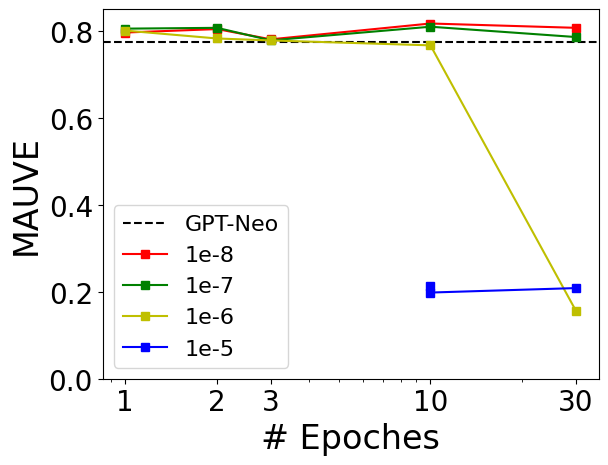

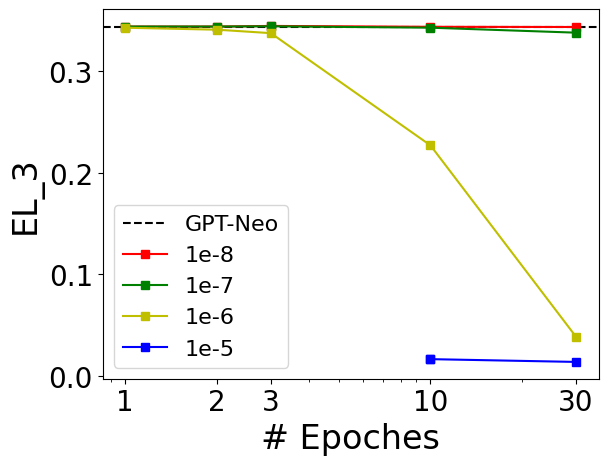

<Figure size 640x480 with 0 Axes>

In [43]:
## Soft Unlikelihood (LORA)
su = df[(df['method'] == 'soft_unlikelihood') & (df['su_strength'] == 10.0) & (df['peft'] == 'lora')]
# remove num_epochs_su = 15 and 20
su = su[(su['num_epochs_su'] != 15) & (su['num_epochs_su'] != 20)]

plt.axhline(y=raw_mauve, color='k', label='GPT-Neo', linestyle='--')
plt.plot(su[su['lr_su'] == 1e-8]['num_epochs_su'],su[su['lr_su'] == 1e-8]['mauve'],'s-',color = 'r',label="1e-8")
plt.plot(su[su['lr_su'] == 1e-7]['num_epochs_su'],su[su['lr_su'] == 1e-7]['mauve'],'s-',color = 'g',label="1e-7")
plt.plot(su[su['lr_su'] == 1e-6]['num_epochs_su'],su[su['lr_su'] == 1e-6]['mauve'],'s-',color = 'y',label="1e-6")
plt.plot(su[su['lr_su'] == 1e-5]['num_epochs_su'],su[su['lr_su'] == 1e-5]['mauve'],'s-',color = 'b',label="1e-5")
# plt.plot(su[su['lr_su'] == 1e-4]['num_epochs_su'],su[su['lr_su'] == 1e-4]['mauve'],'s-',color = 'c',label="1e-4")


plt.xscale('log')
ax = plt.gca()
if 'el' in metric:
    ax.set_ylim([0, None])
ax.set_xticks([1,2, 3, 10, 30])
ax.set_xticklabels(['1', '2', '3', '10', '30'])

plt.xlabel("# Epoches")#横坐标名字
plt.ylabel("MAUVE")#纵坐标名字
plt.legend(loc = "lower left")#图例
plt.show()
plt.savefig('figures/su_lr_MAUVE.png')

plt.axhline(y=raw_el, color='k', label='GPT-Neo', linestyle='--')
plt.plot(su[su['lr_su'] == 1e-8]['num_epochs_su'],su[su['lr_su'] == 1e-8]['el_3'],'s-',color = 'r',label="1e-8")
plt.plot(su[su['lr_su'] == 1e-7]['num_epochs_su'],su[su['lr_su'] == 1e-7]['el_3'],'s-',color = 'g',label="1e-7")
plt.plot(su[su['lr_su'] == 1e-6]['num_epochs_su'],su[su['lr_su'] == 1e-6]['el_3'],'s-',color = 'y',label="1e-6")
plt.plot(su[su['lr_su'] == 1e-5]['num_epochs_su'],su[su['lr_su'] == 1e-5]['el_3'],'s-',color = 'b',label="1e-5")
# plt.plot(su[su['lr_su'] == 1e-4]['num_epochs_su'],su[su['lr_su'] == 1e-4]['el_3'],'s-',color = 'c',label="1e-4")

plt.xscale('log')
ax = plt.gca()
ax.set_xticks([1,2, 3, 10, 30])
ax.set_xticklabels(['1', '2', '3', '10', '30'])

plt.xlabel("# Epoches")#横坐标名字
plt.ylabel("EL_3")#纵坐标名字
plt.legend(loc = "lower left")#图例
plt.show()
plt.savefig('figures/su_lr_EL.png')

# Early Stop


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
csv_path = 'outputs_early_stop/results.csv'
# csv_path = 'outputs_not_important/results.csv'
df = pd.read_csv(csv_path)
# df = df[['method', 'contrastive_coef', 'model_name_or_path', 'gradient_accu', 'peft', 'strat', 'num_epochs', 'focus', 'lr', 'relu_threshold', 'lr_su', 'num_epochs_su', 'su_strength', 'cd_num_token', 'el_3', 'news_mauve', 'wikitext_mauve', 'piqa_', 'winogrande_winogrande_s']]
# df = df[df['model_name_or_path'] == 'EleutherAI/gpt-neo-1.3B']
df = df[df['focus'] == False]
df = df.sort_values(['num_epochs', 'num_epochs_su'])
df.fillna('ft', inplace=True)

pd.set_option('display.max_columns', None)

params = {'legend.fontsize': 16,
          'legend.handlelength': 2,
          'axes.labelsize': 24,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20}

name_map = {'piqa_': 'Piqa', 'ai2_arc_ARC-Challenge': 'ARC-Challenge', 'super_glue_copa': 'Copa', 'winogrande_winogrande_s': 'Winogrande', 'validation_data/pubmed_qa.csv_': 'Pubmed', 'hellaswag_': 'Hellaswag'}
df = df.rename(columns=name_map)
df['NLU_avg'] = df[['Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']].mean(axis=1)
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
csv_path = 'outputs_new/results.csv'
df2 = pd.read_csv(csv_path)
df2 = df2[df2['model_name_or_path'] == 'EleutherAI/gpt-neo-1.3B']
df2 = df2[df2['focus'] == False]
df2 = df2.sort_values(['num_epochs', 'num_epochs_su'])
name_map = {'piqa_': 'Piqa', 'ai2_arc_ARC-Challenge': 'ARC-Challenge', 'super_glue_copa': 'Copa', 'winogrande_winogrande_s': 'Winogrande', 'validation_data/pubmed_qa.csv_': 'Pubmed', 'hellaswag_': 'Hellaswag'}
df2 = df2.rename(columns=name_map)
df2['NLU_avg'] = df2[['Piqa', 'ARC-Challenge', 'Copa', 'Winogrande', 'Pubmed', 'Hellaswag']].mean(axis=1)
df2.fillna('ft', inplace=True)
suft = df2[(df2['method'] == 'soft_unlikelihood') & (df2['peft'] == 'ft') & (df2['lr_su'] == 1e-8)]
suft = suft[suft['num_epochs_su'] == 30]
suft.drop([76,77], inplace=True)
suft

,verbose,filtered_extract_challenge_data_path,model_name_or_path,cache_dir,method,contrastive_coef,strat,relu_threshold,weight_subtraction_coef,num_epochs,lr,train_num,gradient_accu,num_epochs_su,lr_su,su_strength,focus,focus_dataset,focus_coeff,focus_type,focus_hard,do_sample,cd_num_token,DP,DP_coef,wikitext_perplexity,wikitext_rep_2,wikitext_rep_3,wikitext_rep_4,wikitext_div_2,wikitext_div_3,wikitext_mauve,wikitext_coherence,wikitext_similarity_gen,news_perplexity,news_rep_2,news_rep_3,news_rep_4,news_div_2,news_div_3,news_mauve,news_coherence,news_similarity_gen,el_3,el_5,el_10,similarity_ul,ma,Piqa,ai2_arc_ARC-Easy,ARC-Challenge,Copa,Winogrande,Pubmed,Hellaswag,peft,rank,lora_alpha,lr_sc,warmup_steps,weight_decay,NLU_avg
81,False,./data/extract_challenge/filtered.npy,EleutherAI/gpt-neo-1.3B,/nlp/data/riverd/unlearn,soft_unlikelihood,0.1,relu2,0.0,0.25,50.0,0.0001,15000.0,4.0,30.0,1.000000e-08,3.0,False,False,10.0,entity,False,True,1000.0,False,0.0,24.873610,0.095711,0.037496,0.020740,0.892914,0.942577,0.620641,0.594592,0.407681,12.685446,0.067213,0.023859,0.013198,0.925399,0.961005,0.772054,0.579448,0.508702,0.111281,0.074132,0.039812,0.479349,0.794767,0.698045,0.444753,0.444753,0.664062,0.553207,0.535547,0.362123,ft,ft,ft,ft,ft,ft,0.542956
85,False,./data/extract_challenge/filtered.npy,EleutherAI/gpt-neo-1.3B,/nlp/data/riverd/unlearn,soft_unlikelihood,0.1,relu2,0.0,0.25,50.0,0.0001,15000.0,4.0,30.0,1.000000e-08,10.0,False,False,10.0,entity,False,True,1000.0,False,0.0,29.206816,0.084566,0.030363,0.015855,0.904633,0.949685,0.668193,0.601814,0.413420,15.287644,0.061168,0.021323,0.011675,0.930885,0.962449,0.735764,0.577849,0.507625,0.069641,0.038444,0.015939,0.418965,0.777417,0.698045,0.448148,0.448148,0.671875,0.554770,0.539453,0.361228,ft,8.0,16.0,ft,ft,ft,0.545586


In [3]:
tmp = df[df['news_mauve'] > 0.7]
tmp = tmp.iloc[[0,1, 3, 5,6]]
tmp = pd.concat([tmp, suft])
tmp = tmp[['method', 'peft', 'model_name_or_path', 'su_strength', 'el_3', 'el_10', 'ma', 'similarity_ul', 'news_mauve', 'news_perplexity', 'news_rep_3', 'NLU_avg']].round(3)
tmp = tmp.rename(columns={'news_mauve': 'MAUVE', 'el_3': 'EL$_3$', 'el_10': 'EL$_{10}$', 'NLU_avg': 'NLU Avg.', 'ma': 'MA', 'news_perplexity': 'PPL', 'news_rep_3': 'REP$_3$'})
tmp = tmp.reindex([22, 27, 81, 85, 13, 24, 26])
tmp

,method,peft,model_name_or_path,su_strength,EL$_3$,EL$_{10}$,MA,similarity_ul,MAUVE,PPL,REP$_3$,NLU Avg.
22,raw_gpt,ft,EleutherAI/gpt-neo-1.3B,5.0,0.344,0.259,0.953,0.662,0.781,10.473,0.024,0.545
27,raw_gpt,ft,EleutherAI/gpt-neo-2.7B,5.0,0.389,0.309,0.966,0.695,0.800,9.442,0.024,0.582
81,soft_unlikelihood,ft,EleutherAI/gpt-neo-1.3B,3.0,0.111,0.040,0.795,0.479,0.772,12.685,0.024,0.543
85,soft_unlikelihood,ft,EleutherAI/gpt-neo-1.3B,10.0,0.070,0.016,0.777,0.419,0.736,15.288,0.021,0.546
13,soft_unlikelihood,lora,EleutherAI/gpt-neo-1.3B,10.0,0.074,0.015,0.712,0.424,0.723,13.293,0.030,0.541
24,soft_unlikelihood,lora,EleutherAI/gpt-neo-1.3B,3.0,0.091,0.023,0.734,0.467,0.756,12.516,0.030,0.543
26,soft_unlikelihood,lora,EleutherAI/gpt-neo-2.7B,10.0,0.089,0.022,0.768,0.467,0.774,10.787,0.029,0.582


In [62]:
print(tmp.to_latex())

\begin{tabular}{llllrrrrrrrr}
\toprule
{} &             method &  peft &       model\_name\_or\_path &  su\_strength &  EL\$\_3\$ &  EL\$\_\{10\}\$ &     MA &  MAUVE &     PPL &  REP\$\_3\$ &  NLU Avg. \\
\midrule
22 &            raw\_gpt &    ft &  EleutherAI/gpt-neo-1.3B &          5.0 &   0.344 &      0.259 &  0.953 &  0.781 &  10.473 &    0.024 &     0.545 \\
27 &            raw\_gpt &    ft &  EleutherAI/gpt-neo-2.7B &          5.0 &   0.389 &      0.309 &  0.966 &  0.800 &   9.442 &    0.024 &     0.582 \\
81 &  soft\_unlikelihood &    ft &  EleutherAI/gpt-neo-1.3B &          3.0 &   0.111 &      0.040 &  0.795 &  0.772 &  12.685 &    0.024 &     0.543 \\
85 &  soft\_unlikelihood &    ft &  EleutherAI/gpt-neo-1.3B &         10.0 &   0.070 &      0.016 &  0.777 &  0.736 &  15.288 &    0.021 &     0.546 \\
13 &  soft\_unlikelihood &  lora &  EleutherAI/gpt-neo-1.3B &         10.0 &   0.074 &      0.015 &  0.712 &  0.723 &  13.293 &    0.030 &     0.541 \\
24 &  soft\_unlikelihood &

/tmp/ipykernel_26399/342644614.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tmp.to_latex())


In [38]:
csv_path = 'outputs_new/results.csv'
df2 = pd.read_csv(csv_path)
df2 = df2[df2['model_name_or_path'] == 'EleutherAI/gpt-neo-1.3B']
df2 = df2[df2['focus'] == False]
df2 = df2.sort_values(['num_epochs', 'num_epochs_su'])
df2.fillna('ft', inplace=True)
suft = df2[(df2['method'] == 'soft_unlikelihood') & (df['peft'] == 'ft') & (df['lr_su'] == 1e-8)]
suft = suft[suft['num_epochs_su'] == 30]
suft.drop([76,77], inplace=True)
suft

,verbose,filtered_extract_challenge_data_path,model_name_or_path,cache_dir,method,contrastive_coef,strat,relu_threshold,weight_subtraction_coef,num_epochs,lr,train_num,gradient_accu,num_epochs_su,lr_su,su_strength,focus,focus_dataset,focus_coeff,focus_type,focus_hard,do_sample,cd_num_token,DP,DP_coef,wikitext_perplexity,wikitext_rep_2,wikitext_rep_3,wikitext_rep_4,wikitext_div_2,wikitext_div_3,wikitext_mauve,wikitext_coherence,wikitext_similarity_gen,news_perplexity,news_rep_2,news_rep_3,news_rep_4,news_div_2,news_div_3,news_mauve,news_coherence,news_similarity_gen,el_3,el_5,el_10,similarity_ul,ma,piqa_,ai2_arc_ARC-Easy,ai2_arc_ARC-Challenge,super_glue_copa,winogrande_winogrande_s,validation_data/pubmed_qa.csv_,hellaswag_,peft,rank,lora_alpha,lr_sc,warmup_steps,weight_decay
81,False,./data/extract_challenge/filtered.npy,EleutherAI/gpt-neo-1.3B,/nlp/data/riverd/unlearn,soft_unlikelihood,0.1,relu2,0.0,0.25,50.0,0.0001,15000.0,4.0,30.0,1.000000e-08,3.0,False,False,10.0,entity,False,True,1000.0,False,0.0,24.873610,0.095711,0.037496,0.020740,0.892914,0.942577,0.620641,0.594592,0.407681,12.685446,0.067213,0.023859,0.013198,0.925399,0.961005,0.772054,0.579448,0.508702,0.111281,0.074132,0.039812,0.479349,0.794767,0.698045,0.444753,0.444753,0.664062,0.553207,0.535547,0.362123,ft,ft,ft,ft,ft,ft
85,False,./data/extract_challenge/filtered.npy,EleutherAI/gpt-neo-1.3B,/nlp/data/riverd/unlearn,soft_unlikelihood,0.1,relu2,0.0,0.25,50.0,0.0001,15000.0,4.0,30.0,1.000000e-08,10.0,False,False,10.0,entity,False,True,1000.0,False,0.0,29.206816,0.084566,0.030363,0.015855,0.904633,0.949685,0.668193,0.601814,0.413420,15.287644,0.061168,0.021323,0.011675,0.930885,0.962449,0.735764,0.577849,0.507625,0.069641,0.038444,0.015939,0.418965,0.777417,0.698045,0.448148,0.448148,0.671875,0.554770,0.539453,0.361228,ft,8.0,16.0,ft,ft,ft
